In [173]:
import os,glob
from astropy.io import fits
import numpy as np
import pandas as pd
import random
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [85]:
from sklearn.decomposition import FastICA, PCA

In [193]:
fitslist=glob.glob('Kepler_q1/*llc.fits')
fitslist=fitslist[0:5]

In [195]:
def nan_helper(y):
    return np.isnan(y), lambda z: z.nonzero()[0]

for i,file in enumerate(fitslist):
    hdu=fits.open(file)
    _time = np.array(hdu[1].data['TIME'])
    _flux = np.array(hdu[1].data['SAP_FLUX'])
    _flux = (_flux-np.nanmean(_flux))/np.nanstd(_flux) #standardize the lightcurve
    nans,x= nan_helper(_flux)
    _flux[nans]= np.interp(x(nans), x(~nans), _flux[~nans]) #impute nans with interprolation
    
    if i == 0:
        arr_time = _time.reshape((1639, 1))
        arr_flux = _flux.reshape((1639, 1))
    else:
        arr_time = np.concatenate((arr_time,_time.reshape((1639, 1))),axis=1)
        arr_flux = np.concatenate((arr_flux,_flux.reshape((1639, 1))),axis=1)

arr_time = arr_time.T
arr_flux = arr_flux.T
#df_time = pd.DataFrame(arr_time)
#df_flux = pd.DataFrame(arr_flux)

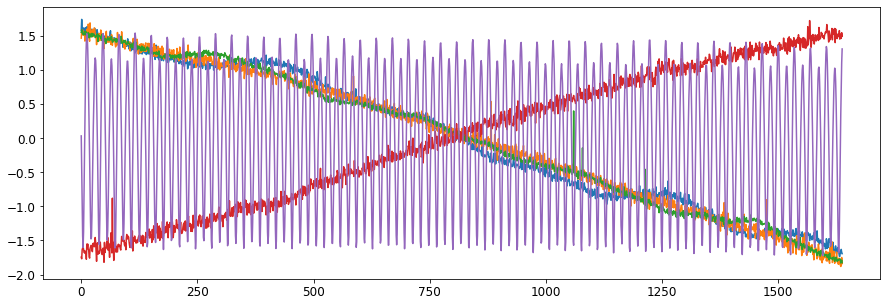

In [196]:
plt.rc('font', size=12)
plt.figure(figsize=(15,5))
for i in random.sample(range(len(fitslist)),5):
    plt.plot(arr_flux[i,0:])


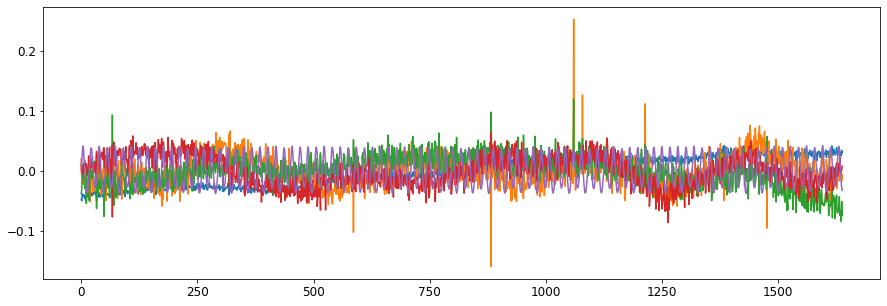

In [198]:
n_com = 5

ica = FastICA(n_components=n_com,max_iter=10000)
ica_com = ica.fit_transform(arr_flux.T)  # Reconstruct signals

plt.rc('font', size=12)
plt.figure(figsize=(15,5))
for i in range(n_com):
    plt.plot(ica_com[0:,i])


In [202]:
n_com = 3
pca = PCA(n_components=n_com)
pca_com = pca.fit_transform(arr_flux.T)

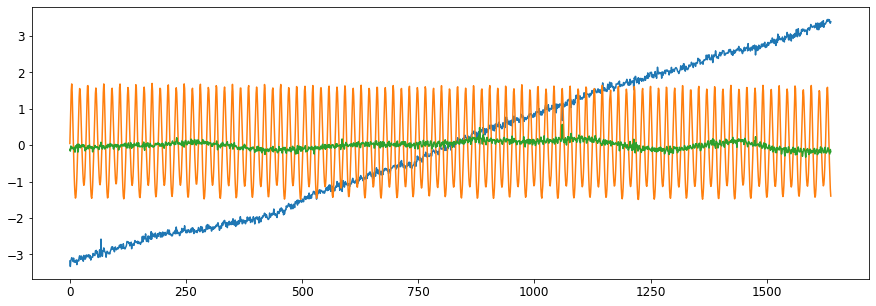

In [203]:
plt.rc('font', size=12)
plt.figure(figsize=(15,5))
for i in range(n_com):
    plt.plot(pca_com[0:,i])
